In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import hdf5storage
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy
import matplotlib.patches as mpatches
import statsmodels.stats.multitest as multitest
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
from sklearn.metrics import r2_score


In [4]:
all_time_info = loadmat("processed_data/all_time_info.mat")

arg_peak_cue_ecog_onset = all_time_info['arg_peak_cue_ecog_onset']
area_onset_cue_ecog_onset = all_time_info['area_onset_cue_ecog_onset']
area_peak_cue_ecog_onset = all_time_info['area_peak_cue_ecog_onset']

arg_peak_cue_ecog_three = all_time_info['arg_peak_cue_ecog_three']
area_onset_cue_ecog_three = all_time_info['area_onset_cue_ecog_three']
area_peak_cue_ecog_three = all_time_info['area_peak_cue_ecog_three']

arg_peak_cue_ecog_sus = all_time_info['arg_peak_cue_ecog_sus']
area_onset_cue_ecog_sus = all_time_info['area_onset_cue_ecog_sus']
area_peak_cue_ecog_sus = all_time_info['area_peak_cue_ecog_sus']

arg_peak_cue_ecog_neg = all_time_info['arg_peak_cue_ecog_neg']
area_onset_cue_ecog_neg = all_time_info['area_onset_cue_ecog_neg']
area_peak_cue_ecog_neg = all_time_info['area_peak_cue_ecog_neg']

arg_peak_acti = all_time_info['arg_peak_acti']
area_onset_acti = all_time_info['area_onset_acti']
area_peak_acti = all_time_info['area_peak_acti']

arg_peak_depression = all_time_info['arg_peak_depression']
area_onset_depression = all_time_info['area_onset_depression']
area_peak_depression = all_time_info['area_peak_depression']

arg_peak_cue_only = all_time_info['arg_peak_cue_only']
area_onset_cue_only = all_time_info['area_onset_cue_only']
area_peak_cue_only = all_time_info['area_peak_cue_only']


In [32]:
label_area_peak_cue_ecog_onset = np.repeat('ecog', area_peak_cue_ecog_onset.shape[1])
label_unit_acti_peak = np.repeat('unit_activation', area_peak_acti.shape[1])
label_unit_dep_peak = np.repeat('unit_depression', area_peak_depression.shape[1])

label_peak = np.concatenate((label_area_peak_cue_ecog_onset, label_unit_acti_peak, label_unit_dep_peak))
peak_val = np.concatenate((area_peak_cue_ecog_onset, area_peak_acti, area_peak_depression), axis=1)
num_peak = np.repeat('peak', len(label_peak))

label_area_onset_cue_ecog_onset = np.repeat('ecog', area_onset_cue_ecog_onset.shape[1])
label_unit_acti_onset = np.repeat('unit_activation', area_onset_acti.shape[1])
label_unit_dep_onset = np.repeat('unit_depression', area_onset_depression.shape[1])
label_onset = np.concatenate((label_area_onset_cue_ecog_onset, label_unit_acti_onset, label_unit_dep_onset))
onset_val = np.concatenate((area_onset_cue_ecog_onset, area_onset_acti, area_onset_depression), axis=1)
num_onset = np.repeat('onset', len(label_onset))

delay = np.squeeze(np.concatenate((peak_val, onset_val), axis=1))
onset_peak = np.concatenate((num_peak, num_onset))
ecog_unit = np.concatenate((label_peak, label_onset))

df_delay = pd.DataFrame({'delay':delay, 'onset_peak':onset_peak, 'ecog_unit':ecog_unit})

<AxesSubplot:>

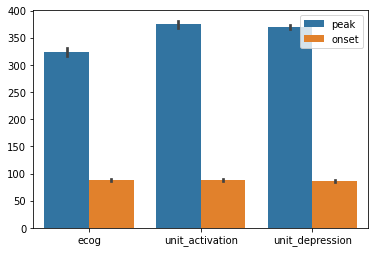

In [33]:
sns.barplot(data=df_delay, x=ecog_unit, y=delay, hue=onset_peak)


<AxesSubplot:xlabel='ecog_unit', ylabel='delay'>

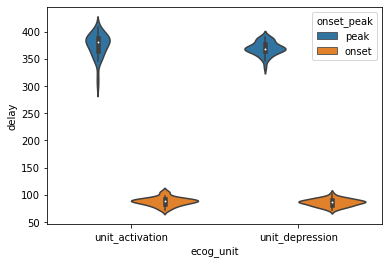

In [34]:
df2 = df_delay[df_delay['ecog_unit']!='ecog']
sns.violinplot(x=df2.ecog_unit, y=df2.delay, hue=df2.onset_peak)


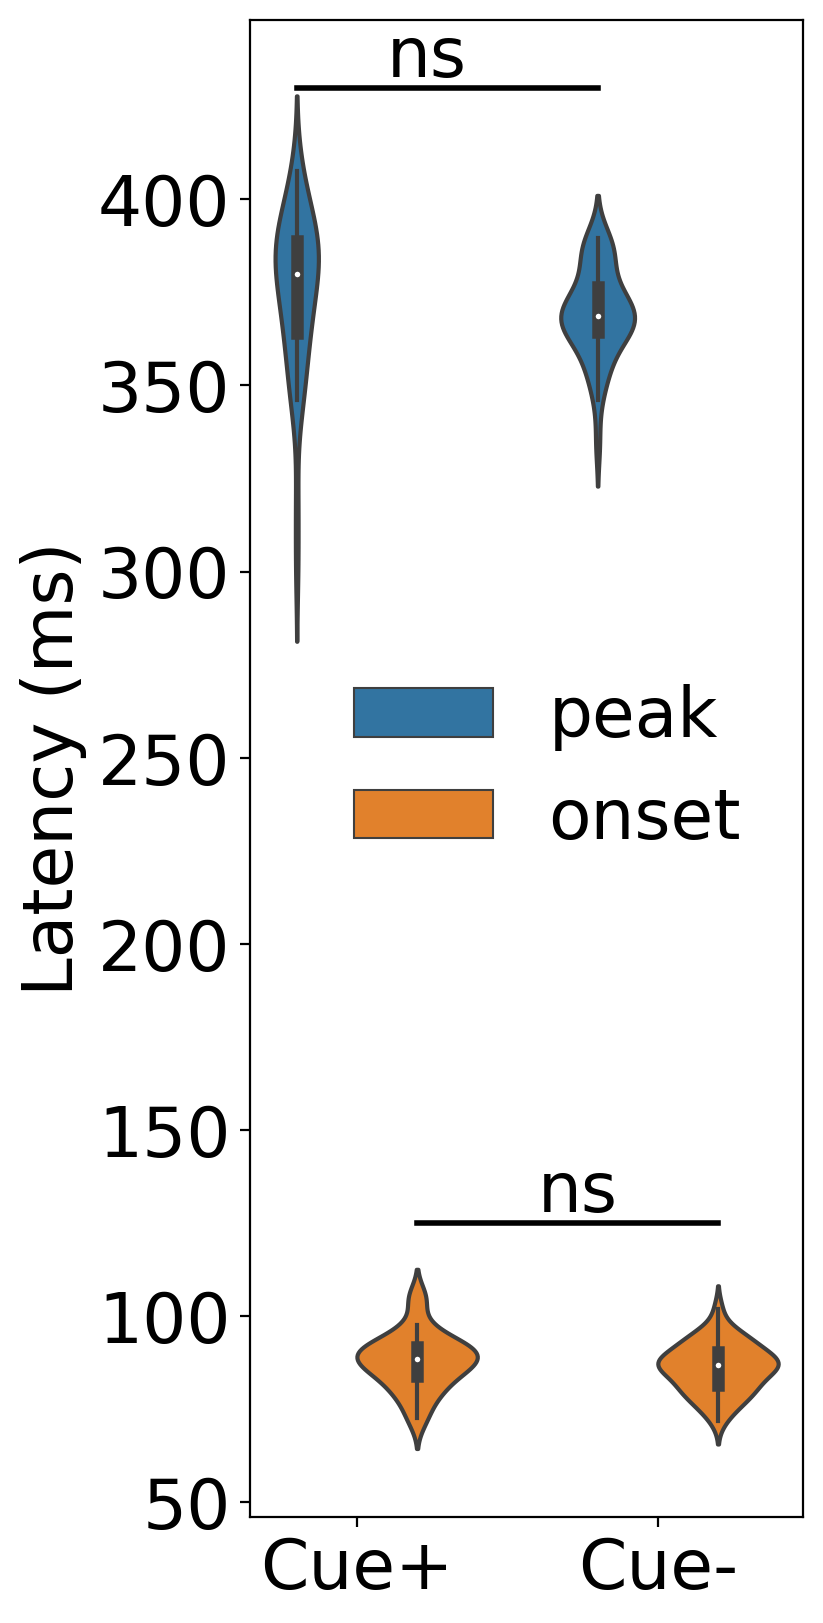

In [65]:
fig, axs = plt.subplots(1, 1, figsize=(4, 8), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)

sns.violinplot(x=df2.ecog_unit, y=df2.delay, hue=df2.onset_peak, ax=axs)
axs.text(0.1, 433, 'ns', fontsize=25)
axs.plot([-0.2, 0.8], [430, 430], 'k-', lw=2)
axs.text(0.6, 128, 'ns', fontsize=25)
axs.plot([0.2, 1.2], [125, 125], 'k-', lw=2)

axs.set_xticklabels(['Cue+', 'Cue-'], fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('')
axs.set_ylabel('Latency (ms)', fontsize=25)
axs.legend(frameon=0, fontsize=25)
plt.plot();

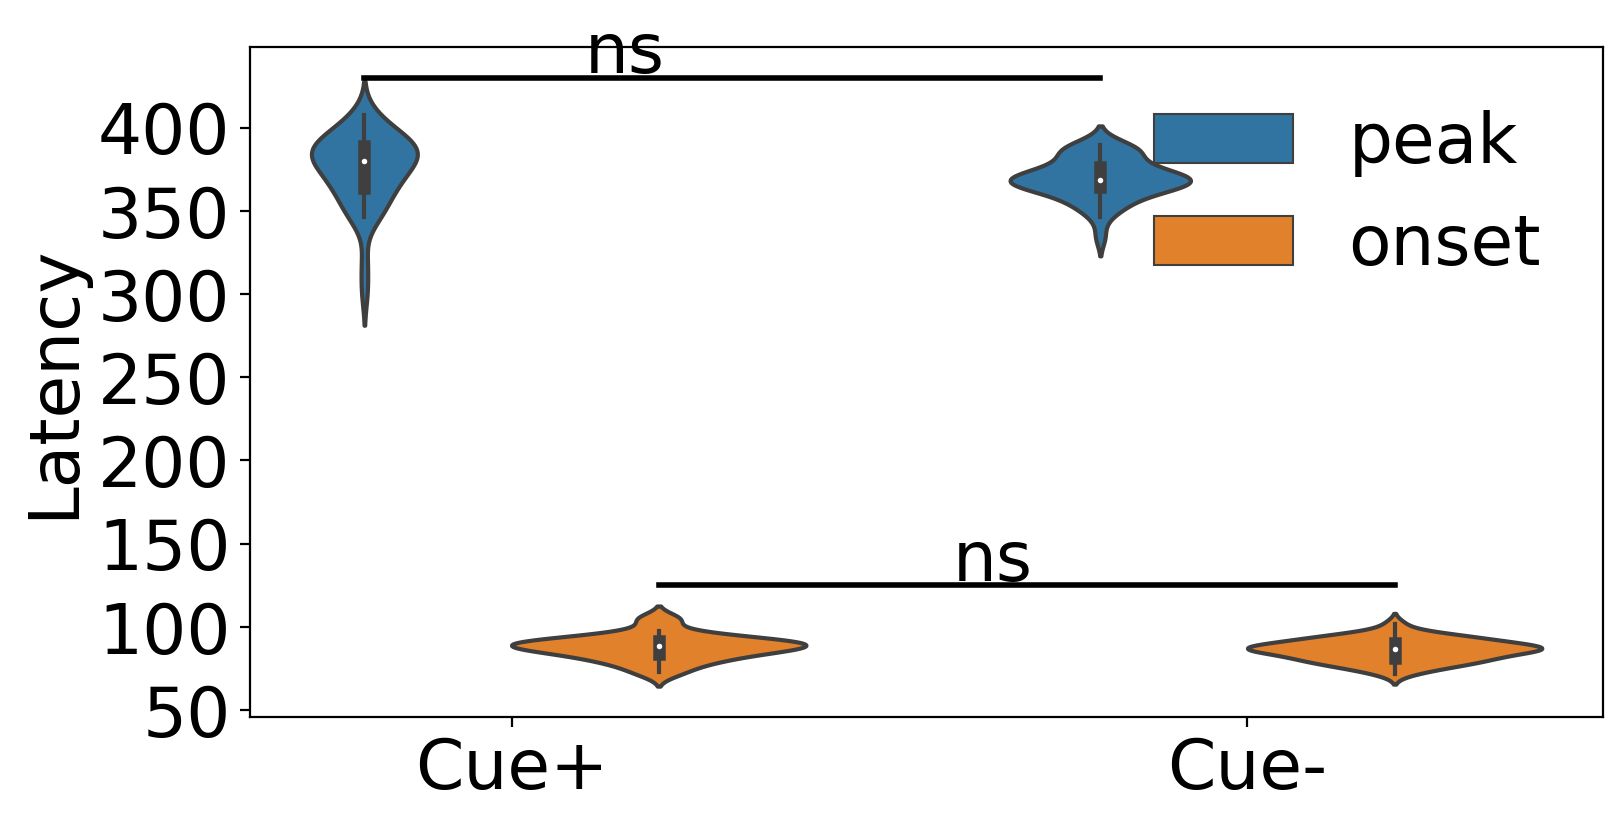

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)

sns.violinplot(x=df2.ecog_unit, y=df2.delay, hue=df2.onset_peak, ax=axs)
axs.text(0.1, 433, 'ns', fontsize=25)
axs.plot([-0.2, 0.8], [430, 430], 'k-', lw=2)
axs.text(0.6, 128, 'ns', fontsize=25)
axs.plot([0.2, 1.2], [125, 125], 'k-', lw=2)

axs.set_xticklabels(['Cue+', 'Cue-'], fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('')
axs.set_ylabel('Latency', fontsize=25)
axs.legend(frameon=0, fontsize=25)
plt.plot();

In [ ]:
label_area_peak_cue_ecog_onset = np.repeat('ecog', area_peak_cue_ecog_onset.shape[1])
label_unit_acti_peak = np.repeat('unit_activation', area_peak_acti.shape[1])
label_unit_dep_peak = np.repeat('unit_depression', area_peak_depression.shape[1])

label_peak = np.concatenate((label_area_peak_cue_ecog_onset, label_unit_acti_peak, label_unit_dep_peak))
peak_val = np.concatenate((area_peak_cue_ecog_onset, area_peak_acti, area_peak_depression), axis=1)
num_peak = np.repeat('peak', len(label_peak))

label_area_onset_cue_ecog_onset = np.repeat('ecog', area_onset_cue_ecog_onset.shape[1])
label_unit_acti_onset = np.repeat('unit_activation', area_onset_acti.shape[1])
label_unit_dep_onset = np.repeat('unit_depression', area_onset_depression.shape[1])
label_onset = np.concatenate((label_area_onset_cue_ecog_onset, label_unit_acti_onset, label_unit_dep_onset))
onset_val = np.concatenate((area_onset_cue_ecog_onset, area_onset_acti, area_onset_depression), axis=1)
num_onset = np.repeat('onset', len(label_onset))

delay = np.squeeze(np.concatenate((peak_val, onset_val), axis=1))
onset_peak = np.concatenate((num_peak, num_onset))
ecog_unit = np.concatenate((label_peak, label_onset))

df_delay = pd.DataFrame({'delay':delay, 'onset_peak':onset_peak, 'ecog_unit':ecog_unit})

In [66]:
label_area_peak_cue_ecog_onset = np.repeat('ecog', area_peak_cue_ecog_onset.shape[1])
label_area_peak_cue_only = np.repeat('cue_only', area_peak_cue_only.shape[1])
label_unit_acti_peak = np.repeat('unit_activation', area_peak_acti.shape[1])
label_unit_dep_peak = np.repeat('unit_depression', area_peak_depression.shape[1])

label_peak = np.concatenate((label_area_peak_cue_ecog_onset, label_area_peak_cue_only, 
                             label_unit_acti_peak, label_unit_dep_peak))
peak_val = np.concatenate((area_peak_cue_ecog_onset, area_peak_cue_only, 
                          area_peak_acti, area_peak_depression), axis=1)
num_peak = np.repeat('peak', len(label_peak))

label_area_onset_cue_ecog_onset = np.repeat('ecog', area_onset_cue_ecog_onset.shape[1])
label_area_onset_cue_only = np.repeat('cue_only', area_onset_cue_only.shape[1])
label_unit_acti_onset = np.repeat('unit_activation', area_onset_acti.shape[1])
label_unit_dep_onset = np.repeat('unit_depression', area_onset_depression.shape[1])

label_onset = np.concatenate((label_area_onset_cue_ecog_onset, label_area_onset_cue_only, 
                             label_unit_acti_onset, label_unit_dep_onset))
onset_val = np.concatenate((area_onset_cue_ecog_onset, area_onset_cue_only, 
                           area_onset_acti, area_onset_depression), axis=1)
num_onset = np.repeat('onset', len(label_onset))

delay = np.squeeze(np.concatenate((peak_val, onset_val), axis=1))
onset_peak = np.concatenate((num_peak, num_onset))
ecog_unit = np.concatenate((label_peak, label_onset))

df_delay = pd.DataFrame({'delay':delay, 'onset_peak':onset_peak, 'ecog_unit':ecog_unit})

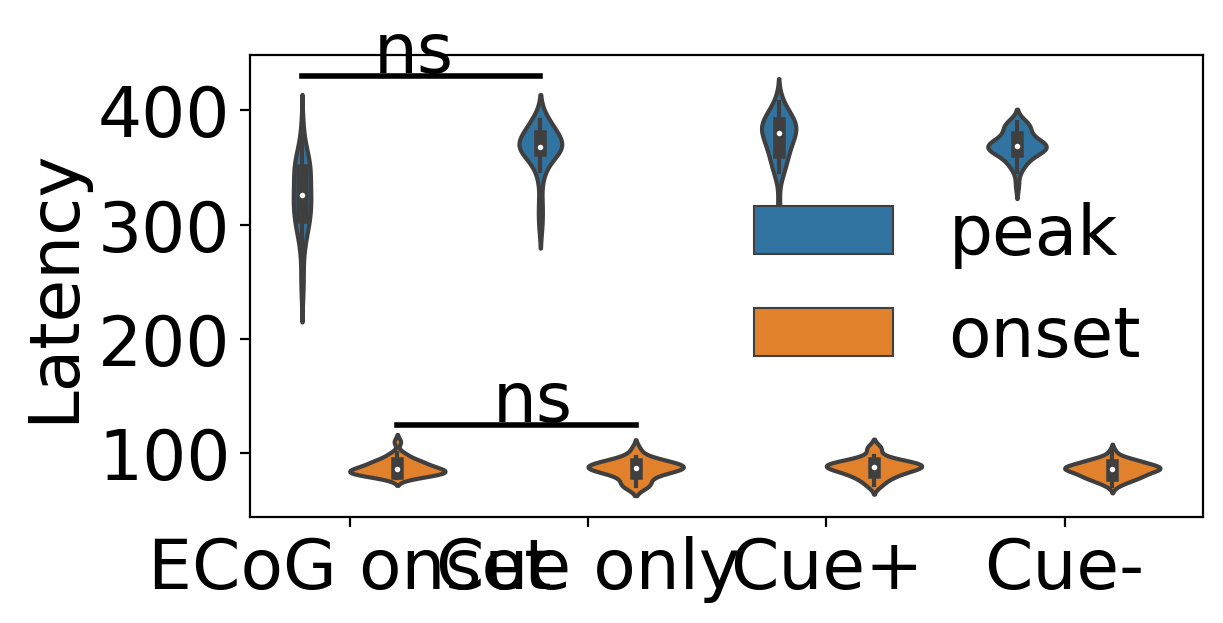

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)

sns.violinplot(x=df_delay.ecog_unit, y=df_delay.delay, hue=df_delay.onset_peak, ax=axs)
axs.text(0.1, 433, 'ns', fontsize=25)
axs.plot([-0.2, 0.8], [430, 430], 'k-', lw=2)
axs.text(0.6, 128, 'ns', fontsize=25)
axs.plot([0.2, 1.2], [125, 125], 'k-', lw=2)

axs.set_xticklabels(['ECoG onset', 'Cue only', 'Cue+', 'Cue-'], fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('')
axs.set_ylabel('Latency', fontsize=25)
axs.legend(frameon=0, fontsize=25)
plt.plot();

In [74]:
f_oneway(area_peak_cue_ecog_onset[0, :], area_peak_acti[0, :])
f_oneway(area_peak_cue_ecog_onset[0, :], area_peak_depression[0, :])
f_oneway(area_peak_acti[0, :], area_peak_depression[0, :])

F_onewayResult(statistic=87.32594058555854, pvalue=1.9563013244853823e-15)

F_onewayResult(statistic=79.78471797924297, pvalue=1.8680577565503793e-14)

F_onewayResult(statistic=2.296792989127589, pvalue=0.13339559591297726)

In [75]:
f_oneway(area_peak_cue_ecog_onset[0, :], area_peak_cue_only[0, :])


F_onewayResult(statistic=36.88737905207103, pvalue=3.508740410292979e-08)

In [79]:
f_oneway(arg_peak_cue_ecog_onset[0, :], arg_peak_acti[0, :])
f_oneway(arg_peak_cue_ecog_onset[0, :], arg_peak_depression[0, :])
f_oneway(arg_peak_acti[0, :], arg_peak_depression[0, :])

F_onewayResult(statistic=0.46579666987942203, pvalue=0.49644464603627847)

F_onewayResult(statistic=24.076854908597387, pvalue=3.5164048092217785e-06)

F_onewayResult(statistic=9.799416583039411, pvalue=0.0024014305782629054)

In [80]:
f_oneway(arg_peak_cue_ecog_onset[0, :], arg_peak_cue_only[0, :])


F_onewayResult(statistic=23.25814564071392, pvalue=6.2434908582367196e-06)